# ReproPhylo in an IPython notebook Docker container
 
## Working with ReproPhylo in IPython notebook
This is an IPython notebook. It consists of text (markdown) cells like this one, which contain comments and explanations, but do not affect the program. Actual script is written in code cells, which have a shaded background. The code in the code cells can be executed (run) by placing the curser anywhere inside a code cell and clicking `shift+enter`.
  
**Run the first code cell bellow.** It will upload ReproPhylo and its dependencies. There is no output to expect, except for a number that will appear, or change, in the square brackets on the left hand side of the code cell.

In [1]:
from reprophylo import *

## Version control in IPython notebook
A version control program called git is incorperated in the ReproPhylo code. This ensures that you will always be able to roll back to older versions of files which might have been overwritten.   
**To get git to start working at the background, run the next cell.**

In [2]:
start_git()



[master (root-commit) 6f74b88] 2 script file(s) from Sun Nov 30 22:24:15 2014
 2 files changed, 4351 insertions(+)
 create mode 100644 .ipynb_checkpoints/Tutorial-checkpoint.ipynb
 create mode 100644 Tutorial.ipynb



/home/amir/Dropbox/python_modules/rpgit.py:68: UserWarning: Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code
  warnings.warn('Thanks to Stack-Overflow users Shane Geiger and Billy Jin for the git wrappers code')


The message received above was generated by git and it is letting us know that a repositary has been created and that this IPython notebook has been recorded in it, and will be tracked for any changes. Input data files and python scripts, should you write any, will be controlled as well.

# Overview of this tutorial
In this tutorial we are going to do the following:

1. Start the environment (you have already done this)
2. Examine lots of data from a taxonomic group in a single genbank file using ReproPhylo
    - Identify which genes are found, and how often
    - Identify synonyms in the gene names
    - Select the genes to use in our analysis
4. Start a ReproPhylo project to contain the data
5. Import the genbank loci you have selected above
    - Explore which taxonomic groups are present
6. Add any additional sequences
    - You may have your own sequences to add to those in genbank
7. Edit the metadata, either manually or programatically   
8. Examine the sequence data statistics
    - GC content
    - sequence length distributions
    - frequencies of ambiguous nucleotides
9. Configure and run and trim a sequence alignment
    - configure what and how to align
    - align
    - trim algnment columns based on criteria supplied to trimAL
10. Configure and build a tree with RAxML
11. Annotate the tree using ETE
12. Use the output to design and run aconcatenated analysis
12. Archive the phylogenetic experiment
    - archive data
    - write experimental report to html file

## Working with a GenBank file
ReproPhylo is designed to easily handle genbank files. The first step would be to make an online NCBI search in a the Nucleotide database. Remember to save a record of your search term for reproducibility! Next save the search results as a genbank file by using menu on the right hand side of the Nucleotide webpage (see figure below).

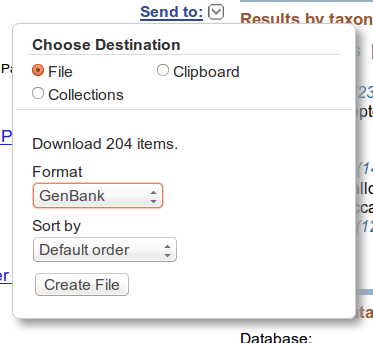

In [3]:
#execute if figure is small
from IPython.display import Image
Image(filename='Selection_003.png')

In most cases, entries in the NCBI Protein database are included in their counterpart Nucleotide database entry under the `translation` qualifier. ReproPhylo allows you to switch easily between the datatypes, as long as you provide this sort of a **Nucleotide** genbank file. For the ocassions in which a protein family is not well represented in the Nucleotide database, it is also possible to work with protein (or nucleotide) fasta files. For the purpose of this tutorial, we have included a genbank file, `Tetillidae.gb`. Below is the [Tetillidae wikipedia page](http://en.wikipedia.org/wiki/Tetillidae) if you are interested what sort of beautiful creatures they are (sponges).

In [4]:
from IPython.display import HTML
HTML('<iframe src=http://en.wikipedia.org/wiki/Tetillidae?useformat=mobile width=900 height=500></iframe>')

 ## Exploring the locus content of a genbank file

The first step in ReproPhylo would be to list the genes present in a genbank file and to quantify how many times each gene occurs. This is done with the `list_loci_in_genbnk()` function. It requires you to specify (as 'arguments') the genbank file name and an output filename. The output file will be a comma separated values (CSV) file, which can be read by ReproPhylo (details below). CSV files are text representations of tables and we use the name loosly to also include tab delimited text.   
The `list_loci_in_genbnk()` function will print the counts and names of the loci in alphabetical order and then by descending counts to see which loci are most frequent. It will allow you to choose which genes to carry forward in the analysis and also to check if there are synonyms for any gene. This function is used as follows:   
<pre>
list_loci_in_genbank("input.gb","output_loci.csv")
</pre>
**Write all the loci from `Tetillidae.gb` to this notebook, as well as a CSV output by running the next cell**

In [5]:
 list_loci_in_genbank('Tetillidae.gb', 'Tetillidae_loci.csv')


There are 57 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
1 instances of CDS,ALD
2 instances of CDS,alg11
1 instances of CDS,ATP synthase beta subunit
3 instances of CDS,atp6
1 instances of CDS,ATP6
3 instances of CDS,atp8
1 instances of CDS,ATP8
1 instances of CDS,ATP9
2 instances of CDS,atp9
1 instances of CDS,catalase
1 instances of CDS,CchGa
1 instances of CDS,CchGb
1 instances of CDS,CchGc
1 instances of CDS,CchGd
1 instances of CDS,CchGe
1 instances of CDS,CchGf
2 instances of CDS,cob
1 instances of CDS,coi
11 instances of CDS,COI
78 instances of CDS,cox1
1 instances of CDS,COX1
3 instances of CDS,cox2
1 instances of CDS,COX2
3 instances of CDS,cox3
1 instances of CDS,COX3
3 instances of CDS,coxI
1 instances of CDS,CYTB
1 instances of CDS,elongation factor 1 alpha
1 instances of CDS,Hsp70
1 instances of CDS,MAT
2 instances of CDS,nad1
2 instances of CDS,nad2
2 instances of CDS

## The loci CSV file
The additional output file can be veiwed by executing the next cell, using the linux `cat` command. Note that terminal commands can be executed from within this notebook by prefixing them with an exclamation mark `!` .  
**Run the next cell to write Tetillidae_loci.csv in this notebook**  
This output is the loci CSV file which can be used to instruct ReproPhylo which loci to include in the analysis and which data type (DNA or protein) to analyse.

In [6]:
!cat Tetillidae_loci.csv

dna,rRNA,18s,18S ribosomal RNA,18S rRNA,small subunit 18S ribosomal RNA
dna,rRNA,28s,28S large subunit ribosomal RNA,28S ribosomal RNA
dna,rRNA,5.8S_rRNA,5.8S rRNA
dna,rRNA,5.8S_ribosomal_RNA,5.8S ribosomal RNA
dna,rRNA,5S_rRNA,5S rRNA
dna,CDS,ALD,ALD
dna,CDS,ATP9,ATP9,atp9
dna,CDS,ATP_synthase_beta_subunit,ATP synthase beta subunit
dna,CDS,CchGa,CchGa
dna,CDS,CchGb,CchGb
dna,CDS,CchGc,CchGc
dna,CDS,CchGd,CchGd
dna,CDS,CchGe,CchGe
dna,CDS,CchGf,CchGf
dna,CDS,Hsp70,Hsp70
dna,CDS,MAT,MAT
dna,CDS,MT-ATP6,atp6,ATP6
dna,CDS,MT-ATP8,atp8,ATP8
dna,CDS,MT-CO1,coi,COI,cox1,COX1,coxI
dna,CDS,MT-CO2,cox2,COX2
dna,CDS,MT-CO3,cox3,COX3
dna,CDS,MT-CYB,CYTB
dna,CDS,MT-ND1,nad1,ND1
dna,CDS,MT-ND2,nad2,ND2
dna,CDS,MT-ND3,nad3,ND3
dna,CDS,MT-ND4,nad4,ND4
dna,CDS,MT-ND4L,ND4L
dna,CDS,MT-ND5,nad5,ND5
dna,CDS,MT-ND6,nad6,ND6
dna,CDS,TPI,TPI
dna,CDS,alg11,alg11
dna,CDS,catalase,catalase
dna,CDS,cob,cob
dna,CDS,ef1a,elongation factor 1 alpha
dna,CDS,nad4L,nad4L
dna,CDS,putative_LAGLIDADG_protein,putative LAG

This file has one line for each locus, where each line contains at least four comma-separated values. The first value is the character type (either `dna` or `prot`). 

The second is the type of locus (ie 'feature type' in genbank terminology); it can be `CDS`, `rRNA`, `tRNA` or anything else. It has to match to at least one feature type in your genebank file in order for it to have any effect (more below). 
The third value is the locus name (e.g. COI) that will be used in ReproPhylo. 

All following values are synonyms of the locus name (e.g. coi,cox1) which might be found as a gene name or product name in the genbank records.

The name cannot have any white space in it, while the synonyms need to appear as they do in the genbank file. Note that in some cases, such as in the first line (the 18S gene) synonyms have been pooled together into one line. In other cases, such as in the last line, (the rrnL gene, which also apears as rnl two lines above) synonyms were not recognised by the `list_loci_in_genbank()` function and have remained in seperate lines. In order to tell ReproPhylo that these two lines are the same gene, a shared integer can be added to both lines in this manner:

<pre>
dna,rRNA,rnl,rnl,5
dna,rRNA,rns,rns
dna,rRNA,rrnL,rrnL,5
</pre>

I have used the number five to show that any number can be used, as long as the lines to join share that number. Also, it's important to remember the comma before the integer (this is CSV file) otherwise the number will be taken as a part of the last alias.

Another possible way to influence the analysis by editing the loci CSV is to change the first value from `dna` to `prot`, or to delete lines containing loci which are not interesting. Note that loci matching less than four unique sequences in the genbank file will be dropped automatically in subsequent stages of the analysis as they will not produce a meaningful tree.

It is possible to edit the loci CSV within this notebook, by starting a code cell with the line `%%file filename`. When this type of cell is executed with `shift+enter`, its content, excluding the first line, will be written to the file `filename`. In the code cell below, I have copied and pasted the content of `Tetillidae_loci.csv`, which we have printed above, using `!cat`. I deleted most of the lines so that it now contains only the 18s, 28s and cox1 genes, which will carry through the analysis.  
**Run the next cell to write the edited loci CSV file to `Tetillidae_loci_edited.csv`.**

In [7]:
%%file Tetillidae_loci_edited.csv
dna,rRNA,18s,18S ribosomal RNA,18S rRNA,small subunit 18S ribosomal RNA
dna,rRNA,28s,28S large subunit ribosomal RNA,28S ribosomal RNA
dna,CDS,MT-CO1,coi,COI,cox1,COX1,coxI

Overwriting Tetillidae_loci_edited.csv


## Starting a ReproPhylo Project
Now that we have a grasp of the loci content of our data and have prepared a loci file, we can use it to start a ReproPhylo `Project`. The `Project` is a ReproPhylo object which will contain all the input and output datasets in our pipeline and will allso record important methods and platform information, which will allow us to report, reproduce and extend the analysis. We can start a `Project` by saving a `Project()` instance into a variable and providing it with a loci file name:  
`pj = Project("loci_file_name")`  

**Run the next cell to start a `Project` instance, which will include the locuse descriptions specified in `Tetillidae_loci_edited.csv`.**

In [2]:
pj = Project("data/edited_loci.csv", git=False)

## Reading data from a genbank file into the `Project` instance
The `Project` object has a bunch of methods that allow it to read data, manage it, configure analyses and run them. In Python, methods are called using a dot notation: `object.method(the, method, variables)`. Variables can be positional, ie their meaning is determined by their position. These are required. In addition there are sometimes optional variables, in which case they will be assigned using the format `keyword=value`. Reading a genbank file, or several genbank files, is done with the method `read_embl_genbank`. It receives one positional argument, which is a list of one or more genbank filenames, as follows:
<pre>
pj.read_embl_genbank(["file1.gb"])
</pre>
or
<pre>
pj.read_embl_genbank(["file1.gb","file2.gb","file3.gb"])
</pre>
As the files are read, only loci that correspond to loci that were described in the loci CSV file will be read, and others will be dropped.  

**To read the file `Tetillidae.gb` into the `Project` using the method `read_embl_genbank()`, run the next cell. **  

As its name conveys, embl formatted files are just as welcome.


In [3]:
pj.read_embl_genbank(["data/Tetillidae.gb"])

/home/amir/Dropbox/python_modules/reprophylo.py:1014: UserWarning: Version control off
  warnings.warn('Version control off')


Since we are running git at the background, reading the file invoked a message from git saying the file was registered in the repository. In git terminology, adding a file to the repository, or recording canges to a file is called a **commit**. In other words, we have commited the canges to the repository.
## Exploring the OTU content of the data
Now that we have specified the loci to analyse, and also provided sequence data and its associated metadata, we can write a table summarising the species repesentation for each locus. This is done with the `species_vs_loci` method, which is used as follows:  
<pre>
pj.species_vs_loci("species_vs_loci_table_output.csv")
</pre>

**By running the next cell, write a summary table to the file "species.csv" using the `species_vs_loci` method.**

In [10]:
pj.species_vs_loci("species.csv")

A utility function called `view_csv_as_table` can be used to display the table in this notebook. It is not a `Project` method and is thus simply used as follows:  
<pre>
view_csv_as_table("input.csv","separator")
</pre>
where 'separator' is the character used to separate the values to columns. In this case tha separator is `"\t"` (tab). The table will be sorted by the alphabetical order of the species names.  

**Use the `view_csv_as_table` function to print "species.csv" in this notebook by runnig the next cell**

In [11]:
view_csv_as_table("species.csv","\t")

species                                       18s   28s   MT-CO1   
Acanthotetilla celebensis                     0     1     1        
Acanthotetilla cf. seychellensis 0CDN8107-V   1     0     0        
Acanthotetilla walteri                        0     1     3        
Amphitethya cf. microsigma AS-2012            0     1     1        
Calthropella geodioides                       0     1     1        
Cinachyra antarctica                          0     1     3        
Cinachyra barbata                             1     1     1        
Cinachyrella alloclada                        3     1     2        
Cinachyrella anomala                          0     2     5        
Cinachyrella apion                            1     1     4        
Cinachyrella australiensis                    3     4     16       
Cinachyrella cf. paterifera 0M9H2022-P        1     0     0        
Cinachyrella cf. schulzei                     0     1     0        
Cinachyrella kuekenthali                      3 

## Reading de novo sequence data
Often, when reconstructing a phylogenetic tree, we would like to include our own new sequences. The `Project` method `read_denovo` is designed to do that. It has two positional parameters: The first is a list of file names to read. The files have to be in the same format (e.g. fasta) and to have the same sequence type (dna/prot). The second parameter is a string representing the sequence type, and could be either `dna` or `prot`. An optional parameter is the `format` parameter. By default this is set to `format="fasta"`, however it can be any format recognised by Biopython, including sequence alignments. If aligned sequences are read however the gaps will be removed. Here is a usage example:  
<pre>
pj.read_denovo(["filename1.fasta","filename.2.fasta"],'dna')
pj.read_denovo(["filename3.fasta"],'prot')
</pre>  
  
**Task: Read a novel DNA sequence from the file `Tetillidae_denovo_sequence.fasta` using the `Project` method `read_denovo()`**

In [5]:
pj.read_denovo(["data/Tetillidae_denovo_sequence.fasta"], "dna")

1

Once again we are informed that git has recorded the new data file. 
 The sequence is now in the `Project`. However, it discloses no information that will allow us to utilize it. In order for ReproPhylo to make sense of it we need to provide information about the gene it contains. If it contains a coding sequence, we might want to specify an open reading frame so that it will be translated and provide us with a protein sequence. Even if we want to analyse DNA sequences, if a protein sequence is available we then have the option of codon-aligning our sequences. To get a protein sequence automatically, we must provide the reading frame, the location of the exons, the strand and the [translation table](http://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi), as feature qualifiers.  
  
The next code cell will add a feature to our denovo sequence and will include all the relevant information to allow a translation to be crated for us.

In [6]:
qualifiers={'gene': 'cox1',
            'transl_table': 4,
            'codon_start': 1,
            'organism': 'Craniella microsigma'}
for record in pj.records:
    if 'denovo' in record.id: # New sequences are assigned with IDs starting
                              # with 'denovo'. See below.
        pj.add_feature_to_record(record.id, 'CDS',
                                 #The location is specified as a list
                                 # of lists. Every sub-list is an exon
                                 # and has the start, the end and the strand.
                                 # The numbers are "real" positions and not
                                 # machine. ie, counting starts from 1.
                                 location=[[1,786,1],[1742,2092,1]],
                                 qualifiers=qualifiers) 

## Editing the metadata programatically
The genbank file comes with a lot of **metadata**; descriptions and extra information about the sequence such as taxonomy, publication etc. However, this data needs to be organized a bit and also extended for it to be useful. Only feature qualifiers can be manipulated (ie, not source qualifiers). The following cell shows how to copy a qualifier from the source to the features, where it can be manipulated. For this we'll use the `add_qualifier_from_source` method.

In [7]:
pj.add_qualifier_from_source('organism')

Here we are going to use the info in the `organism` qualifier to create a new qualifier containing only the genus. This will allow us to examine in a useful way the genera represented in our sequence data. 

The code below loops over the tetillid genera and puts the genus name in the new `genus` qualifier, if this name is found in the `organism` qualifier. This is done by the `if_this_than_that` method. We will use the `part` mode to indicate that while searching for the genus name in the species name we do not require the whole `organism` value to fit, just part of it.

In [8]:
for genus in ['Cinachyrella','Cinachyra','Craniella','Tetilla',
              'Acanthotetilla','Amphitethya','Fangophilina',
              'Paratetilla']:
    pj.if_this_then_that(genus, 'organism', genus, 'genus',
                         mode='part')

Several additional methods for editing the metadata programatically can be used. In the next cell, place the curser right after the dot and click the tab key. A list of all the `Project` methods will appear. You may review it to see all the methods related to metadata manipulations as well as others.

In [16]:
pj.

SyntaxError: invalid syntax (<ipython-input-16-426655ce4982>, line 1)

## Editing the metadata manually

Sometimes, if the dataset is small, there are errors in our metadata that we might wish to correct manually. This is not ideal for a reproducible experiment, but ReproPhylo will keep track of all changes via git, documenting the changes that you have made.

We are going to save all the metadata in the `Project` in a CSV format suitable for a spreadsheet program:

In [17]:
pj.write('Tetillidae_metadata.csv',format='csv')




[master c5d4e2f] Records csv text file from Sun Nov 30 22:24:37 2014
 1 file changed, 196 insertions(+)
 create mode 100644 Tetillidae_metadata.csv



The metadata can be altered by editing the metadata spreadsheet and reading it back to into the `Project`. This can be done in Excel or Libreoffice. However, while using any of those programs, be very aware to the [errors](http://nsaunders.wordpress.com/2012/10/22/gene-name-errors-and-excel-lessons-not-learned/) that might be introduced by the autocorrect, autocomplete and autoformat functions running in there. 
  
So, now that we know we need to be careful, open the file 'Tetillidae_metadata.csv'. Try to spot the new **genus** qualifier you have created above. In order to describe the content of this file we'll be using Biopython and GenBank terminology, as illustrated in this figure: 

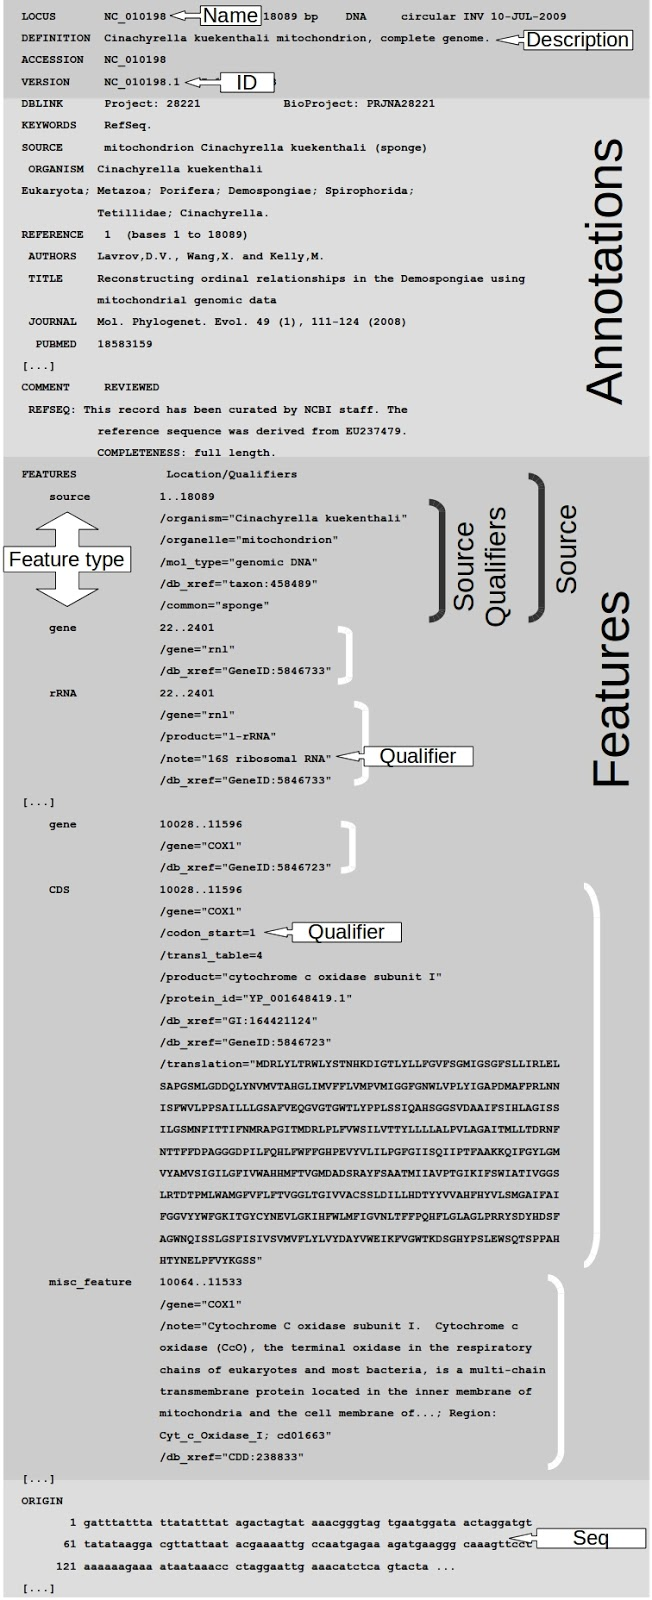

In [18]:
# execute if figure is small
from IPython.display import Image
Image(filename='genbank_terminology.jpg')

Following the GenBank record structure in the figure above, our metadata spreadsheet includes the following columns. 
- Column **A** is the **Record ID**. 
- Column **B** is a short representation of the **Seq**, showing it's 5' and 3' portions. This can help validate the record's identity if a doubt arises. 
- Columns **C** through **W** are the source feature qualifiers. 
- Column **X** is the taxonomy line from the **ORGANISM** field in the **Annotations** section of the GenBank record.  
  
A genbank file may have several sequence features (ie, loci) described. However, it will always have only a single source feature. The information in the source feature is relevant to all the features in the record. For this reason, each and every line in the metadata spreadsheet, starts with the srouce feature qualifiers. Say a GenBank record includes a source feature and five additional features: This will be represented in the spreadsheet as five lines, one for each non-source feature. Across the five lines, the first few columns will be identical as they are derived from the shared source feature. The five lines (representing the five features) will be assigned feature IDs, which consist of the record ID and the suffixes \_f0 to \_f4 (eg, **NC\_010198.1_f3**).  
  
Now scroll down to the very end of the file, to see your denovo sequence. You'll notice that it has been assigned the record ID **denovo0**, a source feature ID **denovo0\_source** and a feature ID **denovo0\_f0**. The first word in the fasta header is recorded as **original_id** and the remaining of the header as **original_desc**, short for **Description**. Find the **translation** column to make sure that a protein sequence has been created. You may move or copy these values to other columns, programmatically as we did above, or manually by editing the spreadsheet as we will do next. At the moment, source qualifiers cannot be edited programatically. They can be copied to the feature qualifiers and edited there. It is, however, possible to edit them in the spreadsheet.

In order to proceed with the analysis there are a few additional things we need to tidy up in our metadata. 

First, we should include some morphological information so that we can annotate our trees with it (it will also be available to anyone wanting to carry the trees out of reprophylo to do some character evolution tests). To do this, first add the three columns **porocalyx**, **cortex** and **calthrops** at the right hand side of the table. These are tetillid morphological features. Now sort the spreadsheet according to the **genus** column. Add the values bellow to each feature, based of it's genus. You can copy the values to the first row in each genus and then drag them down all the way to the last line of this genus. Can you think of a way to this in a script using the `if_this_then_that` method?

<pre>

genus          |  porocalyx  |   cortex  |   calthrops  |
---------------------------------------------------------
Cinachyrella   |      2      |     1     |      1       |
---------------------------------------------------------
Paratetilla    |      2      |     1     |      2       |
---------------------------------------------------------
Amphitethya    |      2      |     1     |      1       |
---------------------------------------------------------
Acanthotetilla |      2      |     1     |      1       |
---------------------------------------------------------
Fangophilina   |      2      |     1     |      1       |
---------------------------------------------------------
Craniella      |      1      |     2     |      1       |
---------------------------------------------------------
Cinachyra      |      2      |     2     |      1       |
---------------------------------------------------------
Tetilla        |      1      |     1     |      1       |
---------------------------------------------------------

</pre>

Next, we want to indicate our outgroup species. In fact, any line that has not been assigned with the genus (ie it says 'null') is in the outgroup order 'Astrophorida'. In the genus column, replace 'null' with 'Astrophorida'. The word 'null' represents a qualifier that does not exist in the feature. Therefore, we cannot use the word 'null' as the outgroup value in the genus column. The genus qualifier will not exist for features with the value 'null', unless we change it to something else.
   
In addition, we want to make sure we will be able to label our new sequence with it's species name. So copy the species name from the  **original_desc** column to the **source:\_organism** column, ommiting the gene name, cox1.
  
Last, there is a coding sequence, **AM076987.1_f1**, encoded from within a cox1 mitochondrial intron, which does not belong to the cox1 CDS. Yet, it has the value 'cox1' in its gene qualifier. To make sure this sequence does not end up in our cox1 dataset, change its gene qualifier value from cox1 to laglidadg. 
  
Now, save the file and make sure you retain the tab delimited CSV format.  
The method `correct_metadata_from_file` will modify the data feature qualifiers according to the canges made to the CSV file. It is used as follows:

In [10]:
pj.correct_metadata_from_file("data/Tetillidae_metadata_edited.csv")

## Reporting sequence statistics

After making sure the sequences are assigned with the correct gene or product name, we can split them to their repsective datasets by using this method:

In [11]:
pj.extract_by_locus()

Once this is done, the first thing ReproPhylo can do with the data is to report some sequence statistics:

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"
Distribution Of Sequence Statistic "Nuc_Degen_Prop"
Distribution Of Sequence Statistic "Prot_Degen_Prop"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


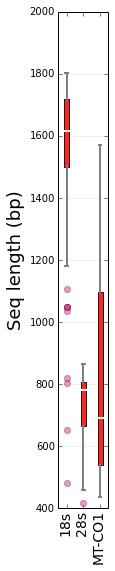

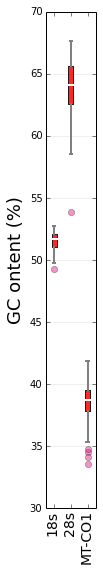

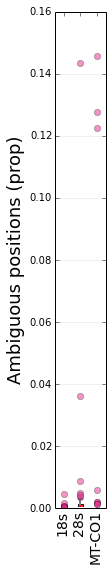

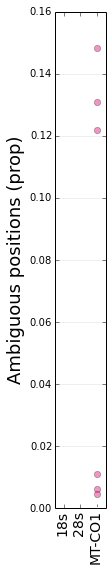

In [21]:
%matplotlib inline
pj.report_seq_stats()

## Configuring and running the sequence alignment
Analyses in ReproPhylo are configured using `Conf` objects and are then run by passing the `Conf` object to the respective `Project` method. For example, a sequence alignment run will be configured by making an `AlnConf` object and then passing it to the `align` method. The next two code cells make two `AlnConf` objects. The first one configures the program `MAFFT` to run the `L-ins-i` algorithm to align the MT-CO1 sequences. `MAFFT` is the default alignment program so it is not explicitly specified.

In [12]:
# Mafft linsi algorithm
mafftLinsi = AlnConf(pj,
                     method_name='mafftLinsi',
                     loci=['MT-CO1'],
                     cline_args=dict(localpair=True, maxiterate=1000))

mafft --localpair --maxiterate 1000 313531432719612.07_CDS_proteins_MT-CO1.fasta


The `AlnConf` object reports the command lines that will be run. The next cell configures the program `MUSCLE` to align the rRNA loci 18s and 28s.

In [13]:
rRNA = ["18s","28s"]

muscle = AlnConf(pj, loci=rRNA,
                 method_name='MuscleDefaults', 
                 program_name='muscle')

muscle -in 574021432719616.2_18s.fasta
muscle -in 574021432719616.2_28s.fasta


The complete set of parameters in the `AlnConf` object are described here:
<pre>
AlnConf(pj,                          # This is the Project object
        method_name='mafftDefault',  # Any string
        CDSAlign=True,               # By default, CDSs will be codon aligned,
        program_name='mafft',        # Currently takes "mafft" or "muscle"
        cmd='mafft',                 # Or if not the env var $path, change to the full path
        loci='all',                  # Or a list of loci names, as appear in the CSV
        cline_args={})               # Any mafft or muscle keyward and argument
</pre>

We can run both the `AlnConf` objects we have configured in one go, using the `align` method, which takes a single parameter, an `AlnConf` object(s) list.

In [14]:
pj.align([mafftLinsi,
          muscle])

## Checkpointing the analysis

Once the sequence alignment is done, the results only exist in the `Project` object in memory. It's a good idea to checkpoint the analysis by saving it to a file. `Project` objects are saved to pickle files (a standard preservation method for both vegetables and data) using the `pickle_pj` function as follows:
<pre>
pickle_pj(pj, "pickle_filename")
</pre>
The `Project` can be revived from a pickle file with the `unpickle_db` function:
<pre>
pj = unpickle_pj("pickle_filename")
</pre>

In [25]:
pickle_pj(pj, "tetillidae_tutorial")

DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened



[master 222fb38] A pickled Project from Sun Nov 30 22:25:30 2014
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tetillidae_tutorial



'tetillidae_tutorial'

Since we are using version control, we can overwrite the pickle file each time we checkpoint. If we need to roll back to any overwritten version, git will allow us to do that.

## Configuring and running the alignment trimming

Alignments often have regions that are messy, with many gaps, which you would like to explude from the tree building as they may introduce more noise than signal. Alignment trimming allows such regions to be excluded based on reproducible alignment quality rules. Currently [trimAl](http://trimal.cgenomics.org/) is the only program used for alignment trimming in ReproPhylo. Trimming is carried out in a similar way to the sequence alignment stage. These are the default settings of the `TrimalConf` object.
<pre>
TrimalConf(pj,                                  # The Project file
           method_name='gappyout',              # Any string
           program_name='trimal',               # The program name, no alternative to trimal as of no
           cmd='default',                       # Can be overidden if trimal is not in $PATH
           alns='all',                          # Or a list of loci names, as appear in the CSV
           trimal_commands={'gappyout': True})  # Any trimal keyword and arg which are
                                                # related to trimming. Others will be ignored.
</pre>  
We'll trim the alignments using the default settings which is the `gappyout` option in trimAl:

In [26]:
gappyout = TrimalConf(pj)

trimal -in 791341417386336.02_28s@MuscleDefaults.fasta -gappyout
trimal -in 791341417386336.02_18s@MuscleDefaults.fasta -gappyout
trimal -in 791341417386336.02_MT-CO1@mafftLinsi.fasta -gappyout


In [27]:
pj.trim([gappyout])

## Configuring and running the tree reconstruction

[RAxML](http://sco.h-its.org/exelixis/web/software/raxml/index.html) is currently the only phylogenetic reconstruction program. The algorithm if set using the `preset=` keyword and takes either the value `fa` for a single ML search with rapid bootstrap, `fD_fb` for ML search(es) with relBootstrap or `fd_b_fb` for ML search(es) with thorough bootstrap. The model is passed with `model=` keyword and a protein substitution matrix with `matrix=`. The number of threads to run is set with `threads=` any additioanl argument can be passed in a dictionary to `cline_args=`. The number of ML searches would be passed as `-N: 100` in this dictionary, and the number of bootstrap replicates as `-#: 100`. The full default settings are:
<pre>
RaxmlConf(pj,
          method_name='fa',
          program_name='raxmlHPC-PTHREADS-SSE3',
          cmd='default',
          preset='fa',
          alns='all',
          model='GAMMA',
          matrix='JTT',
          threads=4,
          cline_args={})
</pre>

Since this is a first pass of the data we can choose `fD_fb` as the preset as `relBootstrap` is extremely fast.

In [28]:
raxml = RaxmlConf(pj, method_name="fD_fb", preset="fD_fb")

raxmlHPC-PTHREADS-SSE3 -f D -m GTRGAMMA -n 254401417386341.34_28s@MuscleDefaults@gappyout0 -p 691 -s 254401417386341.34_28s@MuscleDefaults@gappyout.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m GTRGAMMA -n 254401417386341.34_28s@MuscleDefaults@gappyout1 -p 738 -s 254401417386341.34_28s@MuscleDefaults@gappyout.fasta -t RAxML_bestTree.254401417386341.34_28s@MuscleDefaults@gappyout0 -T 4 -z RAxML_rellBootstrap.254401417386341.34_28s@MuscleDefaults@gappyout0
raxmlHPC-PTHREADS-SSE3 -f D -m GTRGAMMA -n 254401417386341.34_18s@MuscleDefaults@gappyout0 -p 739 -s 254401417386341.34_18s@MuscleDefaults@gappyout.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m GTRGAMMA -n 254401417386341.34_18s@MuscleDefaults@gappyout1 -p 285 -s 254401417386341.34_18s@MuscleDefaults@gappyout.fasta -t RAxML_bestTree.254401417386341.34_18s@MuscleDefaults@gappyout0 -T 4 -z RAxML_rellBootstrap.254401417386341.34_18s@MuscleDefaults@gappyout0
raxmlHPC-PTHREADS-SSE3 -f D -m GTRGAMMA -n 254401417386341.34_MT-CO1@mafftLinsi@

In [29]:
pj.tree([raxml])

## Printing tree figures

A very useful feature of reproducible pipelines is the ability to auto-annotate tree figures. The `Project` method `annotate` annotates all the trees uniformly and makes use of [ETE2](http://etetoolkit.org/). It has the following options:
<pre>
annotate(fig_folder,                   # A local path in which to write figures - required
         root_meta,                    # A qualifier name to get root value from - required
         root_value,                   # The value indicating outgourp taxa - required
                                       # use 'mid' in root_meta and root_value for midpoint root

         leaf_labels_txt_meta,         # A list of qualifiers to use in leaf labels - required
         leaf_node_color_meta=None,    # To color labels, provide a qualifier which will determine the color
         leaf_label_colors=None,       # and provide a dictionary with those values as keys and color
                                       # as values

         node_bg_meta=None,            # To color clade backgrounds, provide a qualifier which will determine color
         node_bg_color=None,           # and provide a dictionary with those values as keys and color
                                       # as values
     
         node_support_dict=None,       # A dictionary of the form ("color": [high_value,low_value]
     
         heat_map_meta = None,         # list of qualifies with numeric values
         heat_map_colour_scheme=2,
     
         multifurc=None,               # A support value under which a node will bo collapsed
     
         scale = 1000                  # The tree width
     
         html = None                   # A file name 
         )
</pre>

We will just make a simple annotation at this stage. 

In [30]:
supports = {'black':[100,99],
            'dimgray':[99,75],
            'silver':[75,50]}

pj.annotate('.', 'genus','Astrophorida',['organism'],
            node_support_dict=supports,
            html="figures")

In [31]:
pickle_pj(pj, "tetillidae_tutorial")


[master 6f5916f] A pickled Project from Sun Nov 30 22:26:07 2014
 1 file changed, 0 insertions(+), 0 deletions(-)



'tetillidae_tutorial'

## Making a concatenated matrix
The final product in a phylogenetic analysis would usually be a phylogenetic tree based on a supermatrix. ReproPhylo can handle the concatenation of sequence alignments for this purpose.  
  
To do that, the user needs to provide information that indicates which sequences should be concatenated into a single line in the supermatrix. In this tutorial we will use the `specimen_voucher` to tie together sequences of different genes that belong to the same sample or OTU. However, some of the genbank records miss this qualifiers. In othe cases, the voucher numbers are spelled slightly differently in different records. All of this could be fixed manually in the metadata CSV, or programatically.  
  
First, we add the `specimen_voucer` to records that miss it:

In [32]:
pj.add_qualifier_from_source('specimen_voucher')

# Add missing/ correct wrong specimen vouchers according to feature id

add_specimen_voucher = [[['JX177968.1_f0'],'specimen_voucher','QMG_321405'],
                        [['JX177913.1_f0',
                          'JX177935.1_f0',
                          'JX177965.1_f0'],'specimen_voucher','TAU_25617'],
                        [['JX177903.1_f0',
                          'JX177938.1_f0'],'specimen_voucher','TAU_25618'],
                        [['HM032740.1_f0',
                          'JX177964.1_f0'],'specimen_voucher','TAU_25621'],
                        [['HM032739.1_f0',
                          'JX177962.1_f0'],'specimen_voucher','TAU_25622'],
                        [['JX177968.1_f0'],'specimen_voucher','QMG_321405'],
                        [['JX177891.1_f0'],'specimen_voucher','RMNH_POR_3100'],
                        [['JX177900.1_f0',
                          'JX177926.1_f0'],'specimen_voucher','TAU_25620'],
                        [['JX177901.1_f0',
                          'JX177961.1_f0',
                          'JX177956.1_f0'],'specimen_voucher','TAU_25619'],
                        [['HM032742.1_f0',
                          'JX177957.1_f0'],'specimen_voucher','MNRJ_576']]
for add in add_specimen_voucher:
    pj.add_qualifier(add[0],add[1],add[2])

# Reformat specimen voucher according to the specimen voucher

Then, we correct spelling differences:

In [33]:
correct_specimen_voucher = [['QMG321405','specimen_voucher','QMG_321405','specimen_voucher'],
                            ['MHNM 16194','specimen_voucher','MHNM_16194','specimen_voucher'],
                            ['TAU 25456','specimen_voucher','TAU_25456','specimen_voucher'],
                            ['QMG320636','specimen_voucher','QMG_320636','specimen_voucher'],
                            ['QMG320270','specimen_voucher','QMG_320270','specimen_voucher'],
                            ['ZMBN:85239','specimen_voucher','ZMBN_85239','specimen_voucher'],
                            ['QMG318785','specimen_voucher','QMG_318785','specimen_voucher'],
                            ['QMG316342','specimen_voucher','QMG_316342','specimen_voucher'],
                            ['QMG314224','specimen_voucher','QMG_314224','specimen_voucher'],
                            ['VM14754','specimen_voucher','VM_14754','specimen_voucher'],
                            ['ZMBN:85240','specimen_voucher','ZMBN_85240','specimen_voucher'],
                            ['ZMBN:81789','specimen_voucher','ZMBN_81789','specimen_voucher'],
                            ['ZMBN:81787','specimen_voucher','ZMBN_81787','specimen_voucher'],
                            ['ZMBN:81785','specimen_voucher','ZMBN_81785','specimen_voucher']]
for correction in correct_specimen_voucher:
    pj.if_this_then_that(correction[0],correction[1],correction[2],correction[3])

# Make a qualifier that will be used to concatenate OTU sequences

Now, for the outgroup, we have no prior knowlage of their voucher numbers nor does it exists in the genbank file. We still want to tie together sequences of the same species. We therefore add a new qualifier, `OTU_dict` that will include the `specimen_voucher` info where it exists, and species names for outgroup speceis:

In [34]:
pj.copy_paste_within_feature('specimen_voucher','OTU_dict')

# Add missing values to the OTU dictionary

add_to_concatenation_dict=[[['AY737635.1_f0',
                             'AY320032.1_f0'],'OTU_dict','Geodia_neptuni'],
                           [['EF564339.1_f0',
                             'HM592832.1_f0'],'OTU_dict','Pachymatisma_johnstonia'],
                           [['HM592717.1_f0',
                             'HM592765.1_f0'],'OTU_dict','Thenea_levis'],
                           [['HM592745.1_f0',
                             'HM592820.1_f0'],'OTU_dict','Theonella_swinhoei'],
                           [['KC762708.1_f0',
                             'NC_010198.1_f0'],'OTU_dict','Cinachyrella_kuekenthali'],
                           [['HM592705.1_f0',
                             'HM592826.1_f0'],'OTU_dict','Calthropella_geodioides']]

for add in add_to_concatenation_dict:
    pj.add_qualifier(add[0],add[1],add[2])

The metadata is sorted and we can design the super matrix. The `Concatenation` class takes care of this:

In [35]:
combined = Concatenation(name='combined',                          # any string
                         loci=pj.loci,                             # In this case we want to include all the loci.
                         otu_meta='OTU_dict',                      # As explained above
                         otu_must_have_all_of=['MT-CO1'],       # Only species that have the genes in this list
                         otu_must_have_one_of =[['18s','28s']]) # Only species that have at least on gene in each sub-list

In [36]:
pj.add_concatenation(combined)

found raxml offensive char   in OTU BIOICE 3659. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.
found raxml offensive char   in OTU TAU 25623. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.
found raxml offensive char : in OTU TAU:25456. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.
found raxml offensive char   in OTU 24-XI-02-3-2 N28. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.
found raxml offensive char   in OTU 22-XI-02-1-13 N25. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.
found raxml offensive char   in OTU ZMBN 77922. Replacing with '_ro_'.Backing up original in the qualifier original_OTU_dict.


In [37]:
pj.make_concatenation_alignments()

Concatenation combined wil have the following data
OTU                           18s                 28s                 MT-CO1              
NIWA_28507                    JX177975.1_f0  JX177943.1_f0  JX177896.1_f0  
TAU_25617                     JX177965.1_f0  JX177935.1_f0  JX177913.1_f0  
NIWA_28910                    JX177982.1_f0                 JX177865.1_f0  
VM_14754                      JX177986.1_f0  JX177960.1_f0  HM032751.1_f0  
ZMBN_85239                    JX177987.1_f0  JX177959.1_f0  HM592669.1_f0  
Thenea_levis                                 HM592765.1_f0  HM592717.1_f0  
LB_113                                       JX177936.1_f0  JX177890.1_f0  
Calthropella_geodioides                      HM592826.1_f0  HM592705.1_f0  
TAU_25618                                    JX177938.1_f0  JX177903.1_f0  
TAU_25619                     JX177961.1_f0  JX177956.1_f0  JX177901.1_f0  
NIWA_28617                    JX177980.1_f0                 JX177912.1_f0  
LB_817                

In [38]:
AlignIO.write(pj.fta('combined'), 'combined.phy','phylip-sequential')

returning trimmed alignment object combined


1

And now a tree can be built:

In [39]:
raxml_method_concat = RaxmlConf(pj, method_name='fD_fb_combined',
                                program_name='raxmlHPC-PTHREADS-SSE3',
                                preset = 'fD_fb', alns=['combined'],
                                model='GAMMA', matrix='JTT', threads=4,
                                cline_args={'-N': 1})

raxmlHPC-PTHREADS-SSE3 -f D -m PROTGAMMAJTT -n 943611417386379.33_combined0 -q 943611417386379.33_combined_partfile -p 747 -s 943611417386379.33_combined.fasta -T 4 -N 1
raxmlHPC-PTHREADS-SSE3 -f b -m PROTGAMMAJTT -n 943611417386379.33_combined1 -q 943611417386379.33_combined_partfile -p 20 -s 943611417386379.33_combined.fasta -t RAxML_bestTree.943611417386379.33_combined0 -T 4 -z RAxML_rellBootstrap.943611417386379.33_combined0


In [40]:
pj.tree([raxml_method_concat])

## Figures with heatmaps
Here, the heatmap option is used to annotate the OTUs with their morphological character states, based on the metadata we added earlier

In [41]:
pj.clear_tree_annotations() #We first need to clear the previous annotations

supports = {'black':[100,99],
            'dimgray':[99,75],
            'silver':[75,50]}

pj.annotate('.', 'genus','Astrophorida',['organism'], html="figures",
            heat_map_meta = ['porocalyx','cortex','calthrops'],
            heat_map_colour_scheme = 1,
            node_support_dict=supports)

Below is an example of how this presence absence matrix would look: 

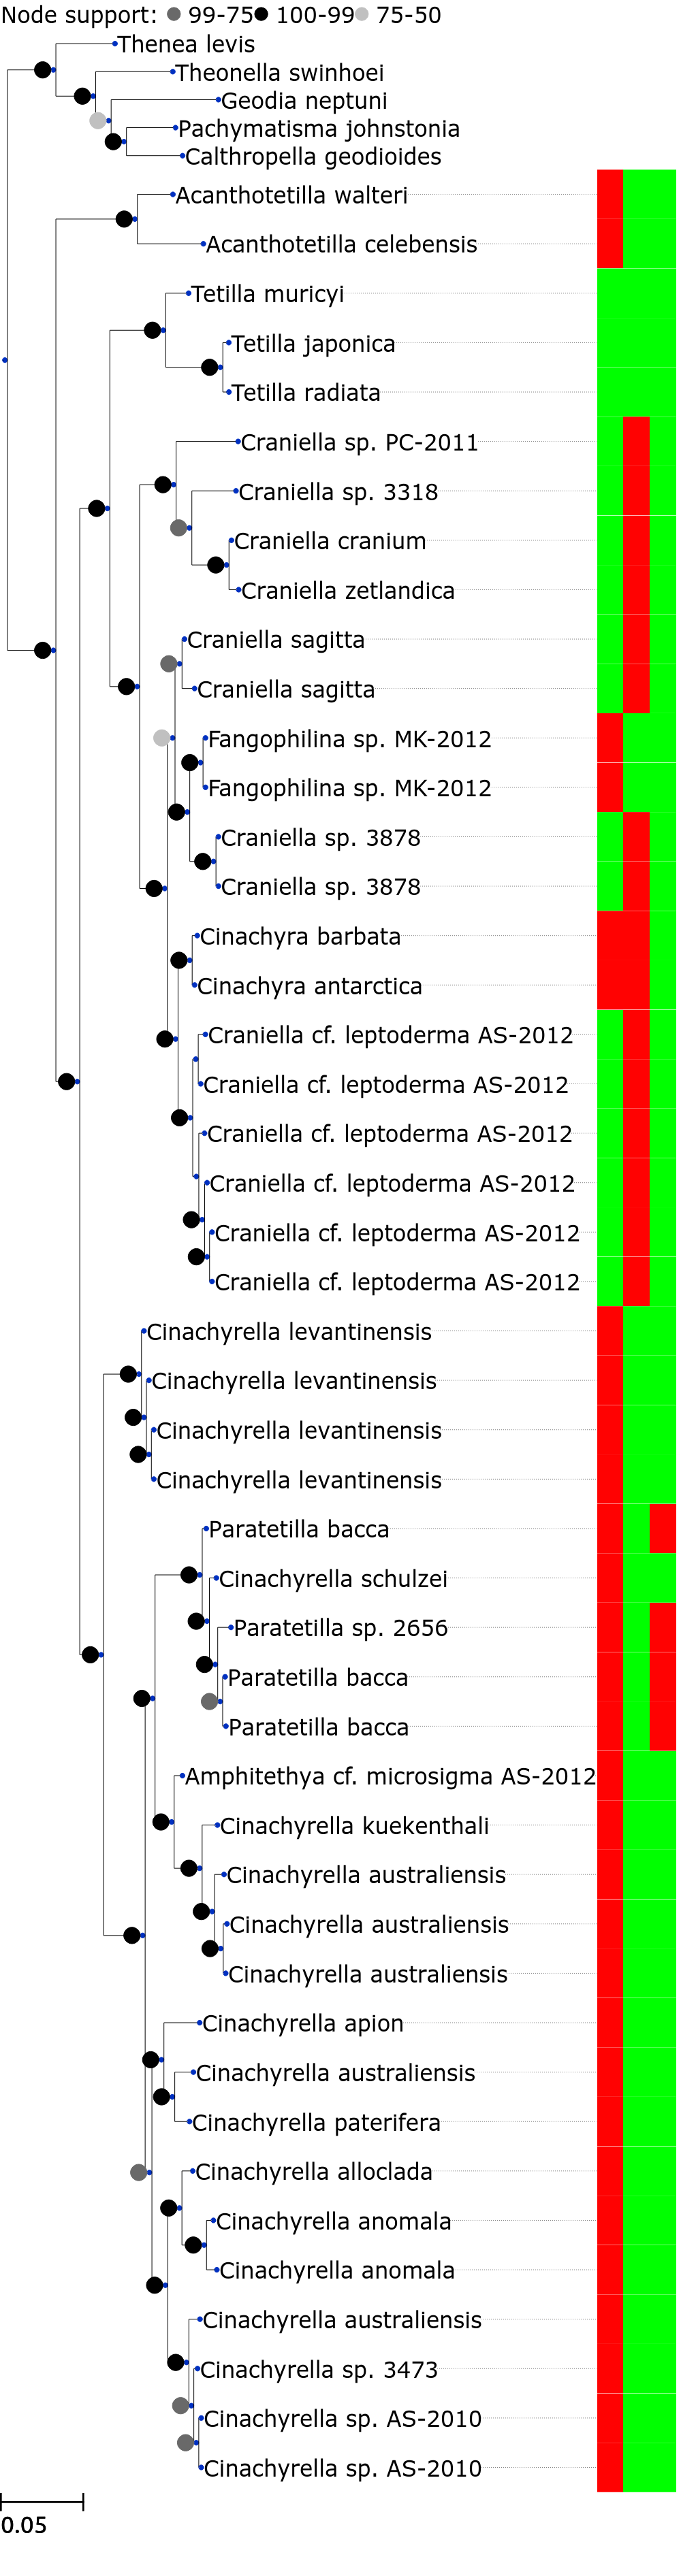

In [42]:
#execute if figure is small
from IPython.display import Image
Image(filename='example_heatmap.png', width=400)

## Figures with clade background colours
Here we use the `genus` qualifier we added to color the background of the tree clades:

In [43]:
pj.clear_tree_annotations()

supports = {'black':[100,99],
            'dimgray':[99,75],
            'silver':[75,50]}

genera_colors = {'Tetilla':'purple',
                 'Cinachyra':'steelblue',
                 'Cinachyrella':'crimson',
                 'Craniella':'royalblue',
                 'Paratetilla':'darkred',
                 'Fangophilina':'mediumslateblue',
                 'Amphitethya':'firebrick',
                 'Acanthotetilla':'rosybrown'
                 }



pj.annotate('.', 'genus','Astrophorida',['organism'], html="figures",
            node_bg_meta="genus",
            node_bg_color=genera_colors,
            node_support_dict=supports)

To see how this annotation will look open the `figures.html` file in the `Tutorial_files` direcoty and use the links to the images.

## Archiving the results

As a final step, ReproPhylo conveniently archives essential outputs: 
1. an html report describing the methods in human-readable format
2. a nexml file containing the sequence alignments and trees
3. a pickled `Project` file to easily resusitate a ReproPhylo experiment
4. a genbank file containing the records that were used in the analysis with the metadata changes that were conducted
5. all the tree figures.

In [44]:
publish(pj, 'Tutorial_results', '.')

checking if file exists



[master cff06f0] Records nexml text file from Sun Nov 30 22:26:54 2014
 2 files changed, 12748 insertions(+), 55 deletions(-)
 create mode 100644 Tutorial_results/tree_and_alns.nexml




[master 15dcae2] Records genbank text file from Sun Nov 30 22:26:54 2014
 1 file changed, 14832 insertions(+)
 create mode 100644 Tutorial_results/sequences_and_metadata.gb

reporter was called by publish
now printing species table
now making sequence statistics plots
now reporting concatenations
now reporting methods
now reporting alignment statistics
making RF matrix
reporting trees
pickling

[master 14e6313] A pickled Project from Sun Nov 30 22:26:57 2014
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Tutorial_results/Sun_30_Nov_2014_22:26:57.pkl

archiving
report ready


/usr/local/lib/python2.7/dist-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [45]:
pj = unpickle_pj("Tutorial_results/Sun_30_Nov_2014_22:26:57.pkl")

In [46]:
publish(pj, 'Tutorial_results_test_unpickled', '.')

checking if file exists



[master 46f83ec] Records nexml text file from Sun Nov 30 22:27:43 2014
 2 files changed, 12753 insertions(+), 27 deletions(-)
 create mode 100644 Tutorial_results_test_unpickled/tree_and_alns.nexml




[master c9817e5] Records genbank text file from Sun Nov 30 22:27:44 2014
 1 file changed, 14832 insertions(+)
 create mode 100644 Tutorial_results_test_unpickled/sequences_and_metadata.gb

reporter was called by publish
now printing species table
now making sequence statistics plots
now reporting concatenations
now reporting methods
now reporting alignment statistics
making RF matrix
reporting trees
pickling

[master 4cf8e11] A pickled Project from Sun Nov 30 22:27:47 2014
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Tutorial_results_test_unpickled/Sun_30_Nov_2014_22:27:46.pkl

archiving
report ready
